An attempt was made as a part of Machine learning team @ DCB, Uok to  propose statistical methods, a deep neural network (DNN)and cluster-based classification technique for author attribution using the transliterated chapters of  Astanga Sangraha and Astanga Hridaya.  The experiments were conducted on selected chapters of both doctrines. 


# 1. Basic Stylometery 

Astangsangraha analysis

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import math
import numpy as np
import scipy as sc
from collections import Counter
import scipy.stats
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


               words  count
0                 ca   3265
1                 na    593
2              tatra    387
3                 sa    286
4            dhyāyaḥ    282
...              ...    ...
48969  antarābhaktaṃ      1
48970    namaskuryāt      1
48971     nimajjanaṃ      1
48972    cirādakṣiṇī      1
48973   tulyagokṣīre      1

[48974 rows x 2 columns]


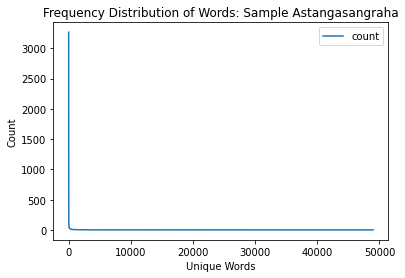

Vocubulary ['ca', 'na', 'tatra', 'sa', 'dhyāyaḥ', 'tathā', 'bhavati', 'atha', 'tataḥ', 'punaḥ', 'tato', 'vyākhyāsyāmaḥ', 'maharṣayaḥ', 'ha', 'tat', 'siddhaṃ', 'tailaṃ', 'smāhurātreyādayo', 'cātra', 'eva', 'tasya', 'tena', 'pṛthak', 'payasā', 'athāto', 'sarpiḥ', 'pacet', 'taṃ', 'ghṛtaṃ', 'param', 'paraṃ', 'pāyayet', 'jāyate', 'hanti', 'api', 'yojayet', 'nāmādhyāyaṃ', 'yasya', 'viṣaṃ', 'bhavanti', 'kṣīraṃ', 'karoti', 'yathāsvaṃ', 'dadyāt', 'viśeṣeṇa', 'sādhayet', 'yathā', 'prayuñjīta', 'ghṛtam', 'pañca', 'pittaṃ', 'yaḥ', 'śītaṃ', 'iva', 'prayojayet', 'yat', 'bhavet', 'payaḥ', 'yadā', 'saha', 'snigdhaṃ', 'sarvaṃ', 'nāma', 'laghu', 'madhukaṃ', 'kramāt', 'evaṃ', 'pītaṃ', 'yaṃ', 'hitam', 'raktaṃ', 'pūrveṇa', 'kuṣṭhaṃ', 'kaphe', 'viśeṣataḥ', 'madhu', 'athātaḥ', 'dvau', 'vamanaṃ', 'sadā', 'tadā', 'yuktaṃ', 'hitaṃ', 'karma', 'payo', 'jayet', 'athavā', 'pakvaṃ', 'sarpiṣā', 'śṛtaṃ', 'ṣaṭ', 'sādhitaṃ', 'rakte', 'sahasā', 'dīpanaṃ', 'tadvat', 'cūrṇaṃ', 'śasyate', 'rūkṣaṃ', 'daśa', 'tadyathā', 'sapt

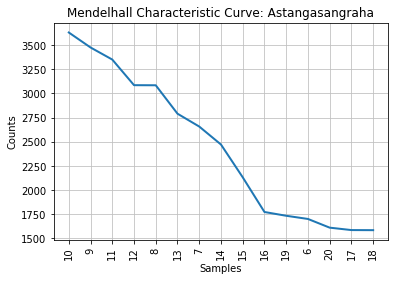

In [ ]:
 
words = re.findall(r'\w+', open('AS Cleaned Full.txt').read())
alphabets = re.compile('.*[A-Za].*') 
filteredwords = [w for w in words if alphabets.match(w)]
wordlst = pd.DataFrame(filteredwords)
wordlst.columns = ['words']
wordlst=wordlst['words'].value_counts()
 
# Frequency distribution plot  of vocubulary
wordlst=pd.DataFrame(wordlst)
wordlst=wordlst.reset_index()
wordlst.columns = ['words','count']
print(wordlst)
wordlst.plot()
plt.title("Frequency Distribution of Words: Sample Astangasangraha")
plt.xlabel("Unique Words")
plt.ylabel("Count")
plt.show()
 
uniquewords=wordlst['words']
uniquewords=list(uniquewords)
print("Vocubulary",uniquewords)
# Carrol Index of the author
V=wordlst.sum()
N=len(wordlst)
R=V[1]/N
print("Carrol Index of Sample Astangasangraha",R)
 
#Mendels curve
 
token_lengths = [len(token) for token in uniquewords]
print(token_lengths)
length_distributions = nltk.FreqDist(token_lengths)
length_distributions.plot(15,title='Mendelhall Characteristic Curve: Astangasangraha')

In [ ]:

def totalsentences(text):
    return re.split('\? |, |!|\n', text)

def totalwords(sentences):
    return sum([sentence.split() for sentence in sentences], [])

def averagewordlength(words):
    return sum([len(word) for word in words]) // len(words)
  
def averagewordbasedsentencelength(sentences):
    return sum([len(sentence.split()) for sentence in sentences]) // len(sentences)

def averagecharsbasedsentencelength(sentences):
    return sum([len(sentence) for sentence in sentences]) // len(sentences)
  
def punctuationscount(text):
    return len([c for c in text if c in string.punctuation])
def vocab_richness_ratio(words):
  return float(len(set(words))) / float(len(words))
def shannon_entropy(words):
  length = len(words)
  freqs = Counter(words)
  distribution = np.array(list(freqs.values()))
  distribution = np.true_divide(distribution, length)
  E = sc.stats.entropy(distribution, base=2)
  return E

In [ ]:
text= open("AS Cleaned Full.txt", "r").read()
sentences = totalsentences(text)
n_sentences = len(sentences)
print(f'number of sentences: {n_sentences}')

words = totalwords(sentences)
n_words = len(words)
print(f'number of words: {n_words}')

avg_word_length = averagewordlength(words)
print(f'average word length: {avg_word_length}')

avg_word_based_sentence_length = averagewordbasedsentencelength(sentences)
print(f'average word-based sentence length: {avg_word_based_sentence_length}')

avg_char_based_sentence_length = averagecharsbasedsentencelength(sentences)
print(f'average char-based sentence length: {avg_char_based_sentence_length}')

punc_count = punctuationscount(text)
print(f'punctuations count: {punc_count}')


richness_ratio = vocab_richness_ratio(words)
print(f'richness ratio: {richness_ratio}') # More closing to 1 is better

print(f'shannon entropy: {shannon_entropy(words)}') # Higher means increasing the uncertainity of words occurance

number of sentences: 22668
number of words: 91272
average word length: 12
average word-based sentence length: 4
average char-based sentence length: 51
punctuations count: 2171
richness ratio: 0.5807366990972039
shannon entropy: 14.167579185300953


Astangahrithaya Analysis

             words  count
0               ca   3208
1               sa   1361
2                a    863
3               na    494
4              tad    456
...            ...    ...
26342    upayogāya      1
26343  nādhmāpayet      1
26344     palāsṛjī      1
26345    harṣaṇaiḥ      1
26346      nyastam      1

[26347 rows x 2 columns]


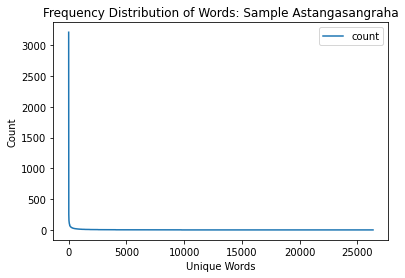

Vocubulary ['ca', 'sa', 'a', 'na', 'tad', 'vāta', 'tat', 'eva', 'pitta', 'yathā', 'tathā', 'api', 'kapha', 'madhu', 'vat', 'sarva', 'rakta', 'pañca', 'tatra', 'tataḥ', 'mūtra', 'kṣīra', 'sneha', 'tailaṃ', 'doṣa', 'punaḥ', 'ghṛta', 'sva', 'vad', 'māṃsa', 'daśa', 'kuṣṭha', 'bahu', 'bala', 'dāha', 'tato', 'kāsa', 'siddhaṃ', 'param', 'jvara', 'taṃ', 'ati', 'kṣaudra', 'mūla', 'pippalī', 'śvāsa', 'rasa', 'vacā', 'yava', 'tvaṃ', 'ghṛtaṃ', 'tena', 'phala', 'roga', 'iva', 'tasya', 'catur', 'atha', 'taila', 'kṣāra', 'ghṛtam', 'phalā', 'śleṣma', 'an', 'mūlaṃ', 'kaṇḍū', 'sarpir', 'snigdha', 'pacet', 'hitam', 'balā', 'viṣa', 'mahā', 'śopha', 'gulma', 'kṣīraṃ', 'kaṭu', 'cūrṇaṃ', 'jāyate', 'pṛthak', 'tac', 'rasaṃ', 'bhavet', 'pāda', 'yat', 'tra', 'tam', 'tvak', 'nimba', 'tvag', 'danta', 'śīta', 'raktaṃ', 'vasti', 'hanti', 'pittaṃ', 'vyoṣa', 'evaṃ', 'yaṣṭy', 'pārśva', 'jaṃ', 'sapta', 'bilva', 'laghu', 'svaṃ', 'kaphe', 'yuktaṃ', 'dadhi', 'prasthaṃ', 'tha', 'ghnaṃ', 'payaḥ', 'saha', 'mukha', 'guda', 'śū

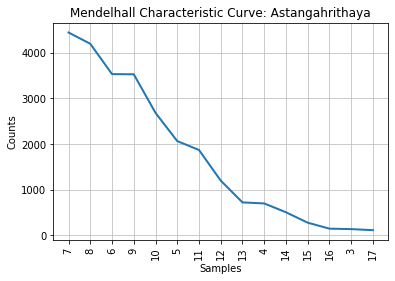

In [ ]:

words = re.findall(r'\w+', open('Astangahrudhayafull.txt').read())
alphabets = re.compile('.*[A-Za].*') 
filteredwords = [w for w in words if alphabets.match(w)]
wordlst = pd.DataFrame(filteredwords)
wordlst.columns = ['words']
wordlst=wordlst['words'].value_counts()

# Frequency distribution plot  of vocubulary
wordlst=pd.DataFrame(wordlst)
wordlst=wordlst.reset_index()
wordlst.columns = ['words','count']
print(wordlst)
wordlst.plot()
plt.title("Frequency Distribution of Words: Sample Astangasangraha")
plt.xlabel("Unique Words")
plt.ylabel("Count")
plt.show()

uniquewords=wordlst['words']
uniquewords=list(uniquewords)
print("Vocubulary",uniquewords)
# Carrol Index of the author
V=wordlst.sum()
N=len(wordlst)
R=V[1]/N
print("Carrol Index of Sample Astangahrithaya",R)

#Mendels curve

token_lengths = [len(token) for token in uniquewords]
print(token_lengths)
length_distributions = nltk.FreqDist(token_lengths)
length_distributions.plot(15,title='Mendelhall Characteristic Curve: Astangahrithaya')

In [ ]:
text= open("astangahrudaya.txt", "r").read()
sentences = totalsentences(text)
n_sentences = len(sentences)
print(f'number of sentences: {n_sentences}')

words = totalwords(sentences)
n_words = len(words)
print(f'number of words: {n_words}')

avg_word_length = averagewordlength(words)
print(f'average word length: {avg_word_length}')

avg_word_based_sentence_length = averagewordbasedsentencelength(sentences)
print(f'average word-based sentence length: {avg_word_based_sentence_length}')

avg_char_based_sentence_length = averagecharsbasedsentencelength(sentences)
print(f'average char-based sentence length: {avg_char_based_sentence_length}')

punc_count = punctuationscount(text)
print(f'punctuations count: {punc_count}')


richness_ratio = vocab_richness_ratio(words)
print(f'richness ratio: {richness_ratio}') # More closing to 1 is better

print(f'shannon entropy: {shannon_entropy(words)}') # Higher means increasing the uncertainity of words occurance

number of sentences: 15566
number of words: 118004
average word length: 7
average word-based sentence length: 7
average char-based sentence length: 60
punctuations count: 47855
richness ratio: 0.3679112572455171
shannon entropy: 11.940816693967351


# 2. Exploratary Analysis

In [ ]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def countplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x,order = df[x].value_counts().index,palette="Blues_d")
    for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 3),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=0,fontsize = 12)
    ax.set_xlabel(x_axis_title,fontsize = 14,weight = 'bold')
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False)  
    plt.title(plot_title, fontsize = 16,weight = 'bold')  

def preprocess_sentence(df): #returns the whole sentence, with preprocessed text
    word_list = []
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', df) #remove punctuations
    #text = text.lower() #lower case
    tokenized_word=word_tokenize(text) #separate into words
    for word in tokenized_word:
        if word not in stop_words: #filter stop-words
            word = stem.stem(word) #stemming
            word_list.append(word) #append to general list
    return ' '.join(word_list) #rejoins the sentence without the stopwords

def process_list(text): #returns a list of preprocessed words
        word_list = []
        #for t in text:            
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text) #remove punctuations
        text = text.lower() #lower case
        tokenized_word=word_tokenize(text) #separate into words
        for word in tokenized_word:
            if word not in stop_words: #filter stop-words
                word = stem.stem(word) #stemming
                word_list.append(word) #append to general list
        return word_list
    
def build_freqs(texts, author):
    authorslist = np.squeeze(author).tolist()
    # Start with an empty dictionary and populate it by looping over all samples
    # and over all processed words in each sample.
    freqs = {}
    words_sample = []
    for text, author in zip(texts,authorslist):
        for word in process_list(text):
            words_sample.append(word)
            pair = (word, author)
            freqs[pair] = freqs.get(pair, 0) + 1  
    return freqs,words_sample

stop_words=set(stopwords.words("english"))
stem = PorterStemmer()

In [ ]:

df_train = pd.read_csv('train_1.csv')
pd.set_option('display.max_colwidth', None)
df_train.head()

,id,text,author
0,id1,pakvāśaya-kaṭī-sakthi-śrotrāsthi-sparśanendriyam |,AH
1,id2,sthānaṃ vātasya tatrāpi pakvādhānaṃ viśeṣataḥ || 1 ||,AH
2,id3,nābhir āmāśayaḥ svedo lasīkā rudhiraṃ rasaḥ |,AH
3,id4,dṛk sparśanaṃ ca pittasya nābhir atra viśeṣataḥ || 2 ||,AH
4,id5,uraḥ-kaṇṭha-śiraḥ-kloma-parvāṇy āmāśayo rasaḥ |,AH


In [ ]:
#Dictionary with Author names for more understandable Plots
author_dict = {'AH': 'Astangahrithaya','AS': 'Astangasangraha'}

Number of Samples: 288,
Number of Features: 4,
Duplicated Entries: 0,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


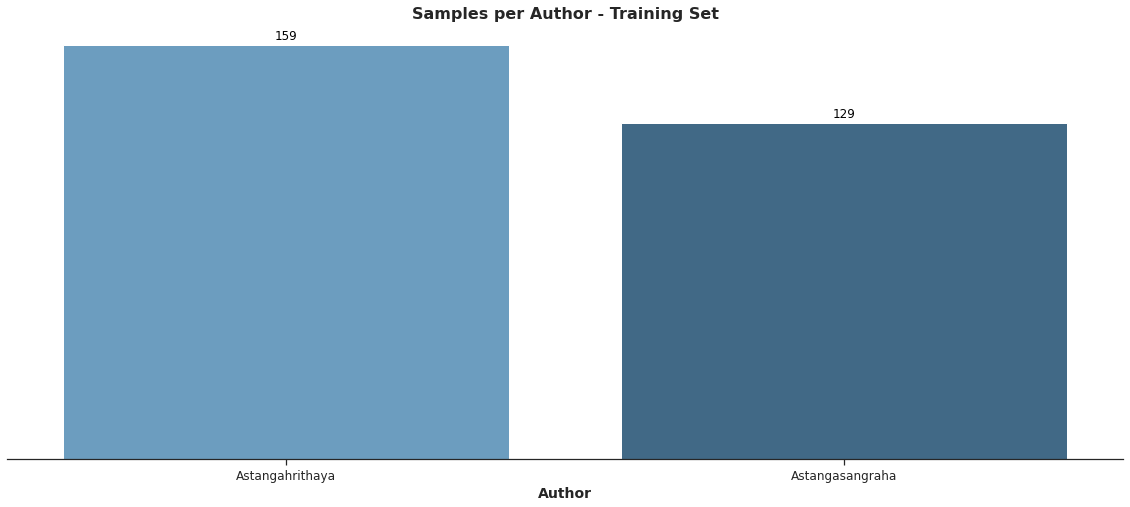

In [ ]:
basic_EDA(df_train)
df_train['Book_name'] = df_train['author'].map(author_dict.get) 
countplot(df_train, 'Book_name', 'Author','Count', 'Samples per Author - Training Set')

In [ ]:
punctuations = string.punctuation

def new_feat(df):
    df['Wordcount'] = df['text'].apply(lambda x : len(x.split()))
    df['Charcount'] = df['text'].apply(lambda x : len(x.replace(" ","")))
    df['Worddensity'] = df['Wordcount'] / (df['Charcount'] + 1)
    df['Punccount'] = df['text'].apply(lambda x : len([a for a in x if a in punctuations]))
    
    return df

df_train_new = new_feat(df_train)

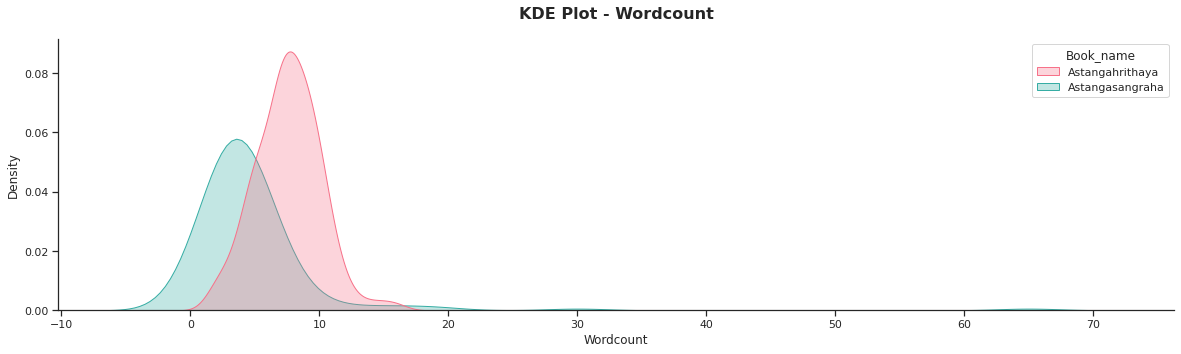

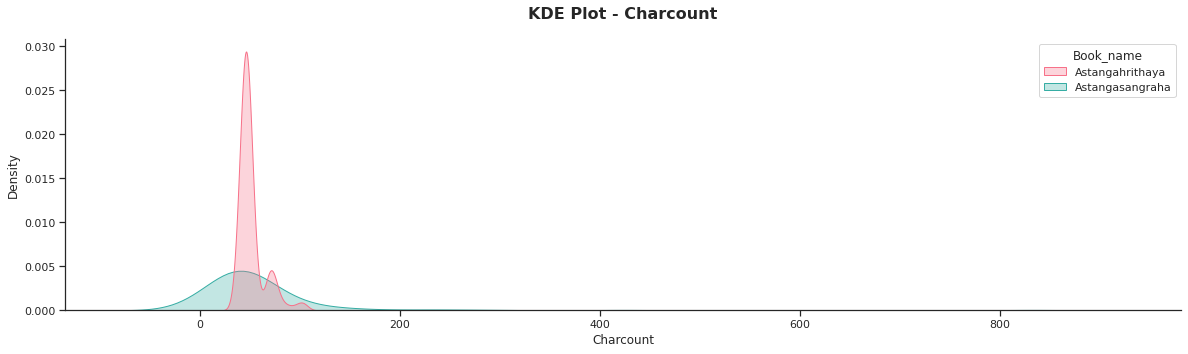

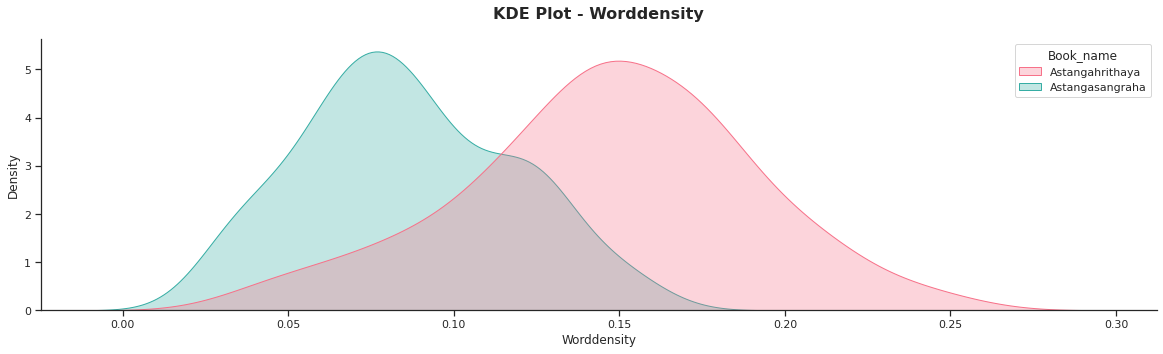

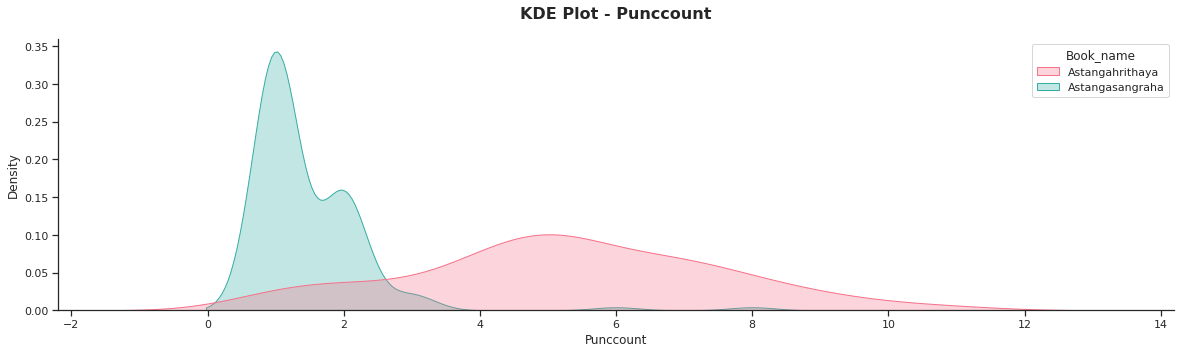

In [ ]:
feat_list = ['Wordcount','Charcount','Worddensity','Punccount']

for i in feat_list:
    plt.figure(figsize=(20,5))
    ax = sns.kdeplot(data = df_train_new, x = i, linewidth=1,alpha=.3, fill = True, hue = 'Book_name',palette = 'husl') 
    ax.set_xlabel(i)
    plt.title('KDE Plot - ' + i, fontsize = 16,weight = 'bold',pad=20);  
    sns.despine(top=True, right=True, left=False, bottom=False)

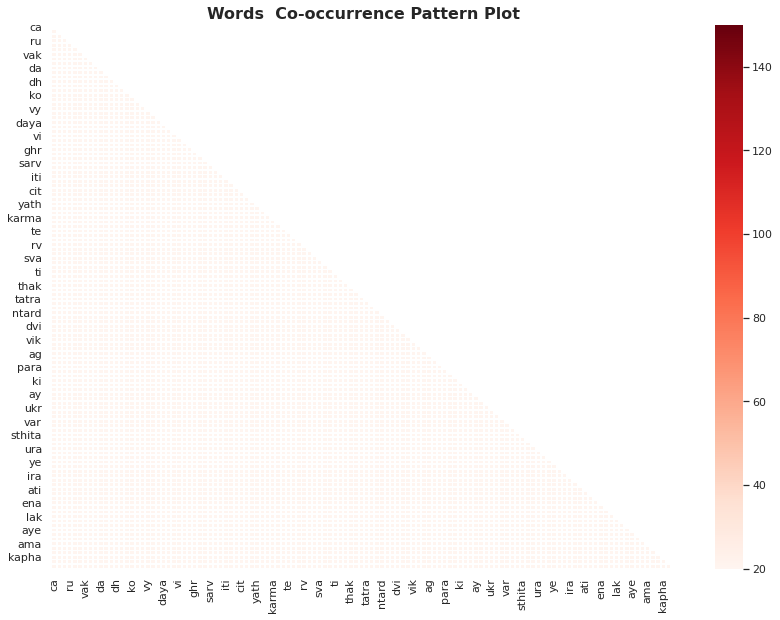

In [ ]:
Corpus = df_train['text'].sample(frac=0.6, random_state=1) #extract sample from Dataset, Adding the whole dataset does not change the pattern
Corpus = list(Corpus) #The CountVectorizer needs the inputs as list

count_model = CountVectorizer(preprocessor = preprocess_sentence, max_features = 120) #extracts the top most used words, uses my function to preprocess
CountVectData = count_model.fit_transform(Corpus) #fits and transforms to my corpus
CountVectDatac = (CountVectData.T * CountVectData) # this is co-occurrence matrix in sparse csr format
CountVectDatac.setdiag(0) # fill same word co-occurence as zero, they have much higher numbers than the remaining words

#Create DF
CountVectDF = pd.DataFrame(CountVectDatac.A, columns=count_model.get_feature_names(), index = count_model.get_feature_names()) #creates DF 
hour_count = CountVectDF.sum(axis=1) #Creates a sum column to be used to order entries

sorter = hour_count.sort_values(ascending = False).index #sorter of rows and columns
CountVectDF = CountVectDF[sorter] #sorts columns according to most occurred word
CountVectDF = CountVectDF.reindex(sorter) #sorts rows in the same order as columns

#Plot
mask = np.zeros_like(CountVectDF)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,10))
    ax = sns.heatmap(CountVectDF, mask=mask, vmax = 150, vmin = 20, linewidths=.8,annot=False,cmap = 'Reds',annot_kws={"size": 10},cbar=True)
plt.title('Words  Co-occurrence Pattern Plot', fontsize = 16,weight = 'bold');

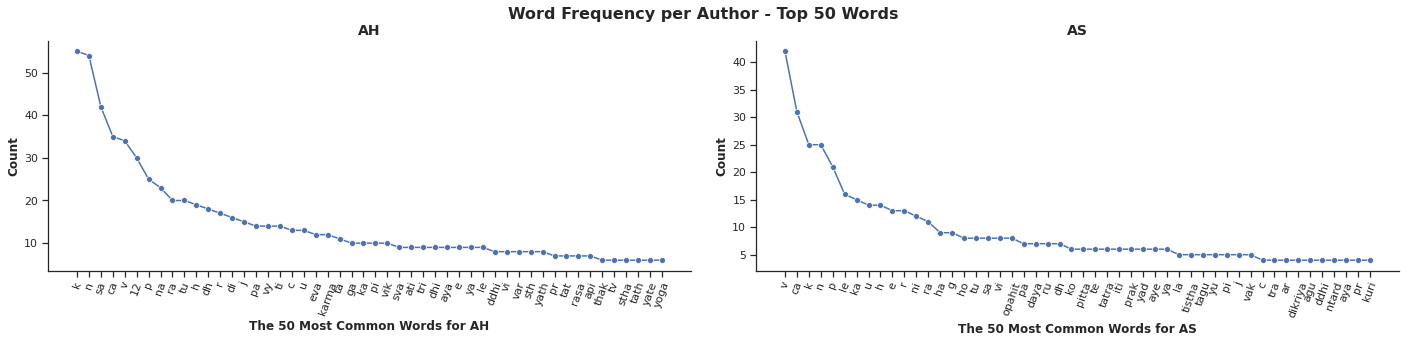

In [ ]:
freqs_author, words = build_freqs(df_train['text'], df_train['author'])

freq_words = []

for word in words:
    AH = 0
    AS = 0
    
    if (word, 'AH') in freqs_author:
        AH = freqs_author[(word, 'AH')]
    if (word, 'AS') in freqs_author:
        AS = freqs_author[(word, 'AS')]
          
    freq_words.append([word, AH,AS])   

freq_wordsDF = pd.DataFrame(freq_words, columns = ['word', 'AH','AS'])    
freq_wordsDF['sum'] =  freq_wordsDF.loc[:, ['AH','AS']].sum(axis=1)
freq_wordsDF.sort_values('sum', ascending=False,inplace=True)
freq_wordsDF.drop_duplicates(inplace=True)
z = 0; j = 0
fig, axarr = plt.subplots(1,2, figsize=(20, 5))

authors_abbr = list(author_dict.keys())

for i in authors_abbr:
    df = freq_wordsDF.loc[:,['word',i]]
    df.sort_values(i, ascending=False,inplace=True)
    ax = sns.lineplot(data=df[0:50],x="word", y=i, marker='o',ax=axarr[z])
    axarr[z].tick_params(axis='x', rotation=70)    
    axarr[z].set_xlabel('The 50 Most Common Words for ' + i,fontsize = 12,weight = 'bold')
    axarr[z].set_ylabel('Count',fontsize = 12,weight = 'bold')
    axarr[z].set_title(i, fontsize = 14,weight = 'bold');
    sns.despine(top=True, right=True, left=False, bottom=False)
    z+=1
    #print(FreqDF[0:15]['word'])
    
fig.tight_layout(pad=2.0)
plt.suptitle('Word Frequency per Author - Top 50 Words',fontsize=16, weight = 'bold');
plt.show()

# 3. Machine Learning Approach

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import * 
from tensorflow.keras.layers import Dense


In [ ]:
traindata = pd.read_excel('train_1.xlsx')
testdata=pd.read_excel('test.xlsx')

In [ ]:
traindata.shape

(31017, 3)

In [ ]:
print(traindata)

            id                                               text Author
0       id4500  upaśāntaparisravaṃ ca punarupasnigdhaṃ tīkṣṇai...     AS
1       id4501        śuddhe ca dīpanāṃścūrṇāsavāriṣṭādīn yojayet     AS
2       id4502        pītauṣadho yadā vegamudīrayati nigṛhṇāti vā     AS
3       id4503                           tadā pravāhikāsya jāyate     AS
4       id4504  tasyāṃ sadāhaśūlaṃ sapicchaṃ śvetaṃ kṛṣṇaṃ rak...     AS
...        ...                                                ...    ...
31012  id35514  yava-tṛṇa-dhānyaṃ bhaktaṃ vidalaiḥ kṣāroṣitair...     AH
31013  id35515  yūṣā bhakṣyāś ca hitā yac cānyac chleṣma-nāśāy...     AH
31014  id35516   yava-tṛṇa-dhānyaṃ bhuktaṃ  vidalaiḥ kṣāroṣita...     AH
31015  id35517  kaṇṭhāmayāś cikitsitam ato drutaṃ teṣu kurvīta        AH
31016  id35518       dhūmātapa-tuṣārāmbu-krīḍāti-svapna-jāgaraiḥ      AH

[31017 rows x 3 columns]


In [ ]:
testdata.shape

(6812, 3)

In [ ]:
print(testdata)

           id                                               text Author
0         id1               athāto jvaracikitsitaṃ vyākhyāsyāmaḥ     AS
1         id2                 iti ha smāhurātreyādayo maharṣayaḥ     AS
2         id3      āmāśayastho hatvāgniṃ sāmo mārgān pidhāya yat     AS
3         id4     vidadhāti jvaraṃ doṣastasmāt kurvīta laṅghanam     AS
4         id5       prāgrūpeṣu jvarādau vā balaṃ yatnena pālayan     AS
...       ...                                                ...    ...
6807  id37831  ato matsaram utsṛjya mādhyasthyam avalambyatām        AH
6808  id37832   abhidhātur vaśāt kiñ-cid ṛṣi-praṇīte prītiś c...     AH
6809  id37833  bheḍādyāḥ kiṃ na paṭhyante tasmād grāhyaṃ su-b...     AH
6810  id37834  hṛdayam iva hṛdayam etat sarvāyur-veda-vāṅ-may...     AH
6811  id37835  kṛtvā yac chubham āptaṃ śubham astu paraṃ tato...     AH

[6812 rows x 3 columns]


# Feature Extraction

In [ ]:
def sentencewords(sentence):
  return len(sentence.split())
def sentencechars(sentence):
  return len(sentence)
def sentencepunctuations(sentence):
  return len([c for c in sentence if c in string.punctuation])
def sentence5mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==5])
def sentence6mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==6])
def sentence7mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==7])
def sentence8mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==8])
def sentence9mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==9])
def sentence10mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==10])
def sentence11mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==11])
def sentence12mer(sentence):
  return len([ele for ele in sentence.split() if len(ele)==12])

In [ ]:
def labelvector(label):
  if label == 'AH':
    return [1.0, 0.0]
  else:
    return [ 0.0, 1.0]
  

def labelindex(label):
  if label == 'AH':
    return 1
  else:
    return 2
  

def vectorizedata(train_df):
  text = traindata['text'].tolist()
  labels = traindata['Author'].tolist()

  
  #X = [[sentencewords(sentence),sentencechars(sentence), sentencepunctuations(sentence),sentence5mer(sentence),sentence6mer(sentence),sentence7mer(sentence),sentence8mer(sentence),sentence9mer(sentence),sentence10mer(sentence),sentence11mer(sentence),sentence12mer(sentence)] for sentence in text]
  X = [[sentencewords(sentence),sentencechars(sentence),sentence5mer(sentence),sentence6mer(sentence),sentence7mer(sentence),sentence8mer(sentence),sentence9mer(sentence),sentence10mer(sentence),sentence11mer(sentence),sentence12mer(sentence)] for sentence in text]
  Y = [labelvector(label) for label in labels]

  X = np.asarray(X)
  Y = np.asarray(Y)
  
  return X, Y


In [ ]:
X, Y  = vectorizedata(traindata)
X

array([[  5,  56,   0, ...,   0,   0,   0],
       [  4,  43,   0, ...,   0,   0,   0],
       [  5,  43,   0, ...,   1,   0,   0],
       ...,
       [ 10, 123,   0, ...,   2,   1,   0],
       [  6,  49,   0, ...,   1,   1,   0],
       [  1,  44,   0, ...,   0,   0,   0]])

In [ ]:
trainmean, trainstd = np.mean(X, axis=0), np.std(X, axis=0)
X = (X - trainmean) / trainstd
X

array([[ 0.17,  0.09, -0.62, ..., -0.48, -0.44, -0.41],
       [-0.2 , -0.3 , -0.62, ..., -0.48, -0.44, -0.41],
       [ 0.17, -0.3 , -0.62, ...,  1.44, -0.44, -0.41],
       ...,
       [ 2.01,  2.1 , -0.62, ...,  3.35,  1.71, -0.41],
       [ 0.54, -0.12, -0.62, ...,  1.44,  1.71, -0.41],
       [-1.3 , -0.27, -0.62, ..., -0.48, -0.44, -0.41]])

In [ ]:
X.shape

(31017, 10)

In [ ]:
def vectorizetestdata(test_df):
  text = testdata['text'].tolist()
  labels = testdata['Author'].tolist()

  
  X = [[sentencewords(sentence),sentencechars(sentence), sentencepunctuations(sentence),sentence5mer(sentence),sentence6mer(sentence),sentence7mer(sentence),sentence8mer(sentence),sentence9mer(sentence),sentence10mer(sentence),sentence11mer(sentence),sentence12mer(sentence)] for sentence in text]
  #X = [[sentencewords(sentence),sentencechars(sentence),sentence5mer(sentence),sentence6mer(sentence),sentence7mer(sentence),sentence8mer(sentence),sentence9mer(sentence),sentence10mer(sentence),sentence11mer(sentence),sentence12mer(sentence)] for sentence in text]
  Y = [labelvector(label) for label in labels]

  X = np.asarray(X)
  Y = np.asarray(Y)
  
  return X, Y

In [ ]:
X1, Y1  = vectorizetestdata(testdata)
testmean, teststd = np.mean(X1, axis=0), np.std(X1, axis=0)
X1 = (X1 - testmean) / teststd

In [ ]:
X1.shape

(6812, 10)

DEEP NEURAL NETWORK

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=X.shape[1], activation='relu',name='D1'))
model.add(Dense(500, input_dim=X.shape[1], activation='relu',name='D2'))
model.add(Dense(200, input_dim=X.shape[1], activation='relu',name='D3'))
model.add(Dense(200, input_dim=X.shape[1], activation='relu',name='D4'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TrainingLog=model.fit(X, Y, batch_size=16, epochs=100, validation_split=0.1,verbose=0)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 500)               5500      
                                                                 
 D2 (Dense)                  (None, 500)               250500    
                                                                 
 D3 (Dense)                  (None, 200)               100200    
                                                                 
 D4 (Dense)                  (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 396,802
Trainable params: 396,802
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Training Accuracy')

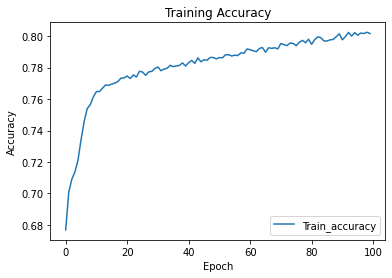

In [ ]:
plt.plot(TrainingLog.history['accuracy'], label='Train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

Text(0.5, 1.0, 'Training LOSS')

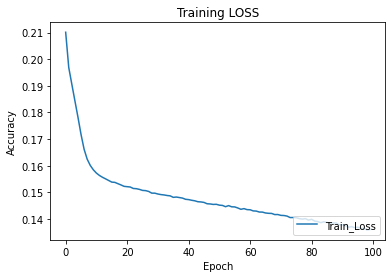

In [ ]:
plt.plot(TrainingLog.history['loss'], label='Train_Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training LOSS')

In [ ]:
acc = TrainingLog.history['accuracy']
val_acc = TrainingLog.history['val_accuracy']

loss = TrainingLog.history['loss']
val_loss = TrainingLog.history['val_loss']

<Figure size 432x288 with 0 Axes>

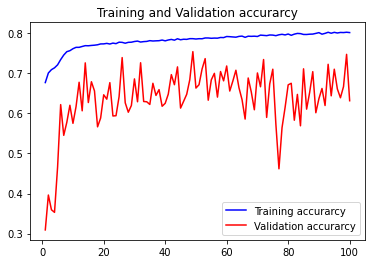

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

In [ ]:
[Socre0,Score1]=model.evaluate(X1, Y1)

213/213 [==============================] - 1s 3ms/step - loss: 0.1727 - accuracy: 0.7501


In [ ]:
X1[1]

array([-0.26, -0.66, -0.54, -0.61, -0.62, -0.62, -0.57, -0.53,  1.28,
       -0.45, -0.41])

In [ ]:
pred = model.predict([[-0.19918714, -0.30427184, -0.61593524,  0.72170502, -0.56620847,
       -0.51012729, -0.48367234, -0.43755953, -0.40721613]])


In [ ]:
pred

array([[0.00814293, 0.99185705]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [ ]:
y_actu=Y1.argmax(axis=1)

In [ ]:
pred = model.predict(X1)

In [ ]:
y_pred=pred.argmax(axis=1)

In [ ]:
confusion_matrix(y_actu, y_pred)

array([[ 999, 1314],
       [ 388, 4111]])

In [ ]:
#Defining function for confusion matrix plot

def plot_confusion_matrix(true_classes, predicted_classes, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


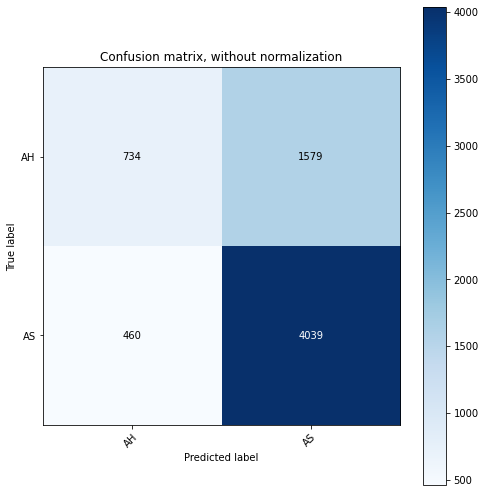

In [ ]:
#Defining the class labels
class_names= ['AH','AS']
     

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_actu, y_pred, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
target_names = ['AH','AS']
print(classification_report(y_actu, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          AH       0.61      0.32      0.42      2313
          AS       0.72      0.90      0.80      4499

    accuracy                           0.70      6812
   macro avg       0.67      0.61      0.61      6812
weighted avg       0.68      0.70      0.67      6812



# 4. Cluster Analysis 
PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, traindata[['Author']]], axis = 1)

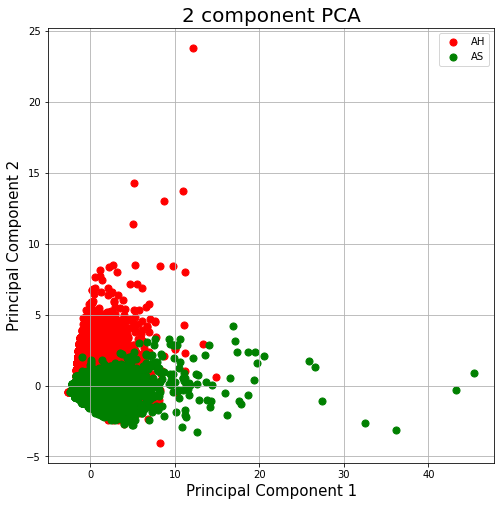

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['AH', 'AS']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Author'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
import plotly.express as px
import numpy as np

pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
finalDf

,principal component 1,principal component 2,Author
0,0.187940,-0.973749,AS
1,-0.690014,-0.538297,AS
2,0.023372,-0.886116,AS
3,-1.183079,-0.138323,AS
4,2.252828,0.033543,AS
...,...,...,...
31012,1.284916,0.645115,AH
31013,0.148525,-0.234580,AH
31014,4.418274,1.698896,AH
31015,0.743906,-0.360477,AH


In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=finalDf['Author'])

fig.show()